## Purpose: Noise

Demonstration: 
    1. Parameter fit
    2. Influence of noise on the Evidence

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from BayesicFitting import PolynomialModel
from BayesicFitting import Fitter
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
import matplotlib.pyplot as plt

define some constants

In [2]:
N = 21
sig = 0.1

make a 3-degree polynomial

In [3]:
x = numpy.linspace( -2.0, 3.0, N, dtype=float )
ym = 1.2 + 0.5 * x + 0.33 * x * x + 0.27 * x * x * x

noise = numpy.random.randn( N )


We construct data with an increasing amounts of noise and calculate the evidence for polynomial models of increasing degree. 


    scale    degree   evidence
    0.010         0   -29.670
    0.010         1   -25.385
    0.010         2   -21.546
    0.010         3     6.360
    0.010         4     1.455
    0.010         5    -3.045
    0.010         6    -8.307


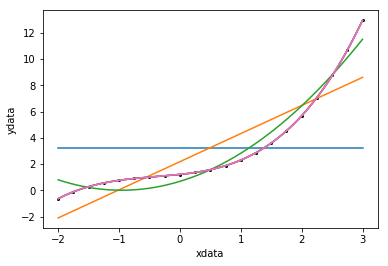

    scale    degree   evidence
    0.100         0   -29.589
    0.100         1   -25.280
    0.100         2   -21.693
    0.100         3   -10.640
    0.100         4   -14.545
    0.100         5   -18.045
    0.100         6   -22.307


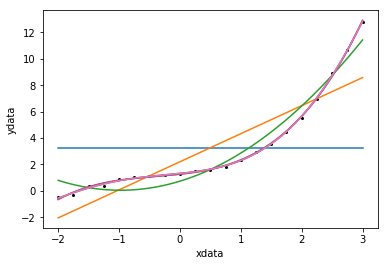

    scale    degree   evidence
    1.000         0   -29.168
    1.000         1   -25.934
    1.000         2   -26.365
    1.000         3   -27.640
    1.000         4   -30.545
    1.000         5   -33.045
    1.000         6   -36.307


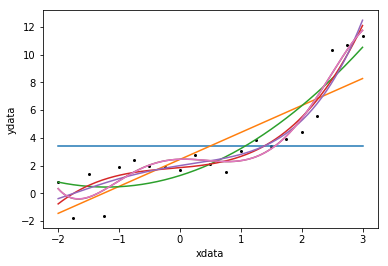

    scale    degree   evidence
   10.000         0   -39.387
   10.000         1   -41.076
   10.000         2   -42.773
   10.000         3   -44.640
   10.000         4   -46.545
   10.000         5   -48.045
   10.000         6   -50.307


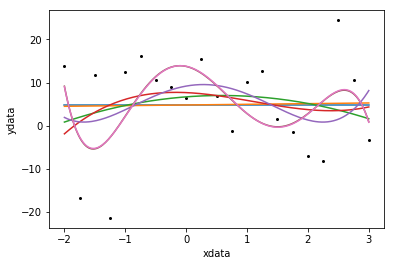

In [4]:
# plotFit( x, y, truth=ym, show=False )
yy = numpy.zeros( (4,7), dtype=float )
xi = numpy.linspace( -2.0, 3.0, 201, dtype=float )
col = ["blue", "green", "red", "mint", "magenta", "yellow", "black"]
sig = 0.01
for k in range( 4 ):
    y = ym + sig * noise
    plotFit( x, y, show=False )
    print( "    scale    degree   evidence")
    for deg in range( 7 ) :
        poly = PolynomialModel( deg )
        np = poly.getNumberOfParameters()
        fitter = Fitter( x, poly )
        param = fitter.fit( y )
        plt.plot( xi, poly( xi ) )
        chisq = fitter.chisq
        stdev = fitter.stdevs
        logpr = fitter.getEvidence( limits=[-100,100], noiseLimits=[0.01,10] )
        print( fmt( sig ), fmt( deg ), fmt( logpr ) )
        yy[k,deg] = logpr
    sig *= 10
    plt.show()

Plot the evidences found: data with noise of 0.01 in green, noise of 0.1 in red, 1 in blue and 10 in magenta. 

Note that the model selection depends on the amount of noise present in the data.
    

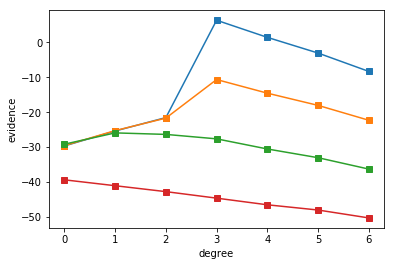

In [5]:
for k in range( 4 ) :
    plt.plot( yy[k,:], '-s' )
plt.xlabel( "degree" )
plt.ylabel( "evidence" )
plt.xlim( -0.3, 6.3 )
plt.show()